# <span style='color:teal'> 1. 개요</span>
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C, C++, Python 등에서 사용 가능
- 설치: pip install opencv-python

# <span style='color:teal'> 2. 이미지 읽어서 살펴보기</span>
cv2.imread(file_name,flag)
- 이미지를 읽어 Numpy 객체로 만드는 함수
    1. file_name: 읽고자 하는 이미지 파일
    2. flag: 이미지를 읽는 방법 설정
        - IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
        - IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
        - IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
    3. 반환 값: Numpy 객체(행,열, 색상: 기본이 RGB가 아닌 BGR이다)
- Jupyter Notebook 에서 시각화 할때는 plt.imshow()
- imread / imwrite / imshow

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

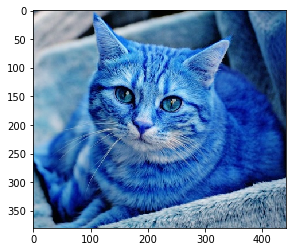

In [3]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(image)

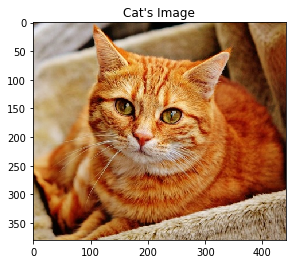

In [5]:
# JUPYTER에서는 컬러를 바꿔야한다.(converter to color)
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Cat's Image")
plt.imshow(cat)

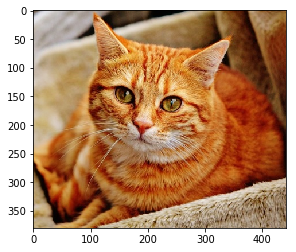

In [6]:
b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
image = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(image)

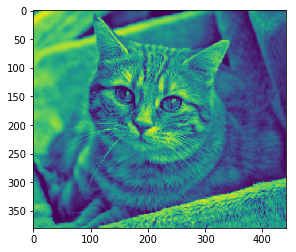

In [8]:
# Gray Scale Image
# 빛이니까 255개가 white 즉 빛을 쬘수록 밝아진다.
# 0은 검정색.
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage) # 이렇게만 하면 이상해진다.

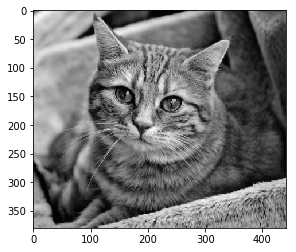

In [11]:
# Gray Scale Image2
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap=plt.get_cmap('gray'))

# <span style='color:teal'> 3. OpenCV 이미지 연산</span>
### **픽셀수 및 이미지 크기 확인**

In [13]:
image = cv2.imread('images/image_2.png')
print(image.shape)
print(image.size)
# 크기 720 x 1280, 색상수 3개
# 720 x 1280 x 3 = 픽셀수

(720, 1280, 3)
2764800


### **특정 범위 픽셀 변경**

In [17]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255] # 하얀색깔 
print("--- %s seconds ---" % (time.time() - start_time))

# (0,0)은 맨왼쪽 윗부분 부터 (100,100)까지
# 데이터를 바꾸는 시간이 얼마나 걸리는지 

--- 0.00900125503540039 seconds ---


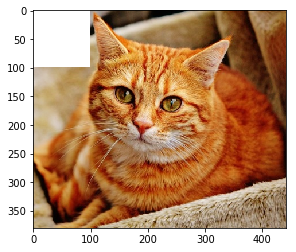

In [15]:
# cv2.imshow('Image', image)
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage)

In [21]:
# 윗부분과 같이 for를 쓰지않고 slicing으로 바꿀 수 있다.
# 훨씬 빠르다. 배운거 쓰자.
#앞의 basicImage에서 cvtColor로 되었기 때문에 변경없이 바로 실행 가능
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0] 
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0005002021789550781 seconds ---


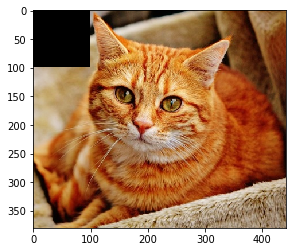

In [19]:
plt.imshow(basicImage)

# <span style='color:teal'> 4. 이미지 크기 조절</span>

- 이미지를 늘릴 때 늘려진 중간에 있는 데이터를 어떻게 채울것이냐.

## = 보간법

이미지 크기 조절

cv2.resize(image, dsize, fx, fy, interpolation)
- dsize:Manual Size : 가로로 길게 세로로 길게처럼
- fx: 가로 비율
- fy: 세로 비율
- interpolation:보간법
    - INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
    - INTER_AREA: 사이즈를 작게 할 때 주로 사용

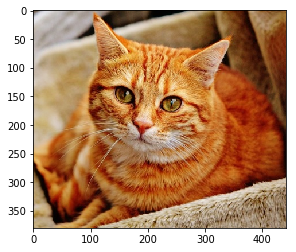

In [26]:
# 1
image = cv2.imread('images/cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

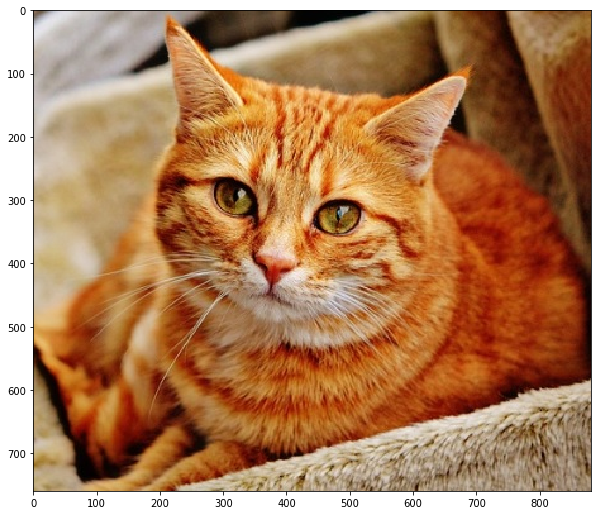

In [38]:
shrink = cv2.resize(image, None, fx=2, fy=2, 
                    interpolation=cv2.INTER_AREA)
# cv2.imshow('Image', shrink)
plt.figure(figsize=(10,10))
plt.imshow(shrink)

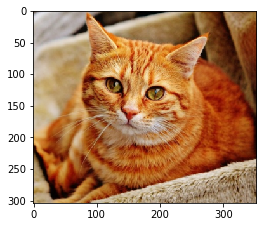

In [33]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, 
                    interpolation=cv2.INTER_AREA)
# cv2.imshow('Image', shrink)
plt.figure(figsize=(4,4))
plt.imshow(shrink)

# <span style='color:teal'> 5. 이미지 위치 변경</span>
cv2.warpAffine(image, M, dsize)
- M: 변환 행렬
- dsize: Manual Size
  
- 변환 행렬
    - 𝑀11 𝑀12 𝑀13
    - 𝑀21 𝑀22 𝑀23
- 이미지의 모든 좌표 (a, b)는 다음의 좌표로 이동
    - (𝑀11 ∗ 𝑎 + 𝑀12 ∗ 𝑏 + 𝑀13, 𝑀21 ∗ 𝑎 + 𝑀22 ∗ 𝑏 + 𝑀23)
- 단순 이미지 위치 변경
    - 1 0 x위치
    - 0 1 y위치

In [49]:
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]
print(height, width)

380 441


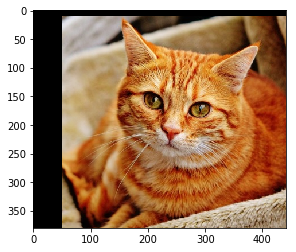

In [44]:
M = np.float32([[1, 0, 50], [0, 1, 10]]) # x축으로 50 y축으로 10
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

# <span style='color:teal'> 6. 이미지 회전</span>

cv2.getRotationMatrix2D(center, angle, scale)
- center: 회전 중심
- angle: 회전 각도
- scale: Scale Factor  
  
  
- 회전 변환을 위한 기본적인 행렬
    - 𝑐𝑜𝑠𝜃 −𝑠𝑖𝑛𝜃
    - 𝑠𝑖𝑛𝜃 𝑐𝑜𝑠𝜃

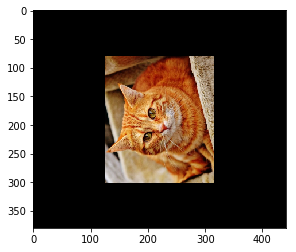

In [52]:
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

# <span style='color:teal'> 7. 이미지 합치기</span>
- cv2.add(): Saturation 연산 수행. 0 보다 작으면 0, 255 보다 크면 255 로 표현
- np.add(): Modulo 연산 수행. 256은 0, 257 은 1 로 표현

In [53]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

### Saturation 연산으로 이미지 합치기

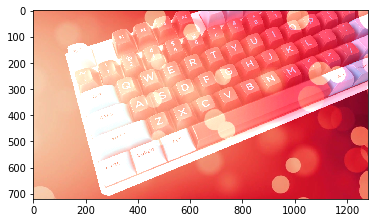

In [58]:
# cv2 식으로 합치기
result = cv2.add(image_1, image_2)
# cv2.imshow('Image', result)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

### Modulo 연산으로 이미지 합치기

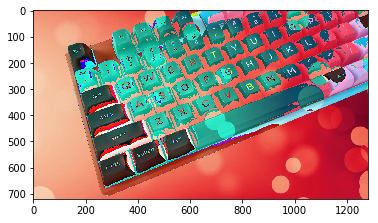

In [57]:
# np식으로 합치기
result2 = image_1 + image_2
# cv2.imshow('Image', result)
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

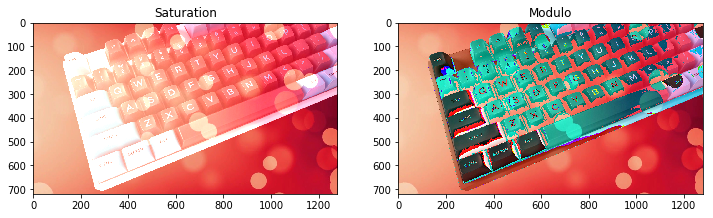

In [71]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Saturation')
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)

plt.subplot(122)
plt.title('Modulo')
result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

# <span style='color:teal'> 8. OpenCV 임계점 처리하기</span>
문지방(Thresh)을 넘어간다.  
이미지의 기본 이진화  
 
   
**cv2.threshold(image, threshold, max_value, type)**  


- 임계값을 기준으로 흑/백으로 분류하는 함수
- image: 처리할 Gray Scale 이미지
- threshold: 임계값 (전체 픽셀에 적용)
- max_value : 임계값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식
    - THRESH_BINARY: 임계값보다 크면 max_value, 작으면 0
    - THRESH_BINARY_INV: 임계값보다 작으면 max_value, 크면 0
    - THRESH_TRUNC: 임계값보다 크면 임계값, 작으면 그대로
    - THRESH_TOZERO: 임계값보다 크면 그대로, 작으면 0
    - THRESH_TOZERO_INV: 임계값보다 크면 0, 작으면 그대로

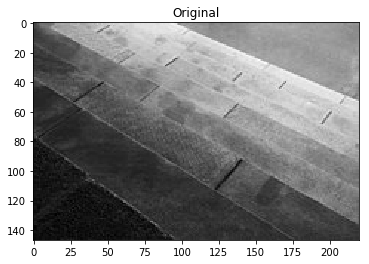

In [59]:
basic = cv2.imread('images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

In [60]:
grey1 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY)
grey2 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY_INV)
grey3 = cv2.threshold(basic, 127, 255, cv2.THRESH_TRUNC)
grey4 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO)
grey5 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO_INV)

In [61]:
grey1 # 튜플 127이라는 임계치

(127.0, array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

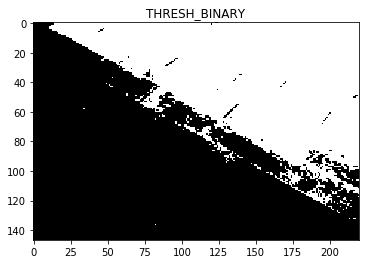

In [62]:
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

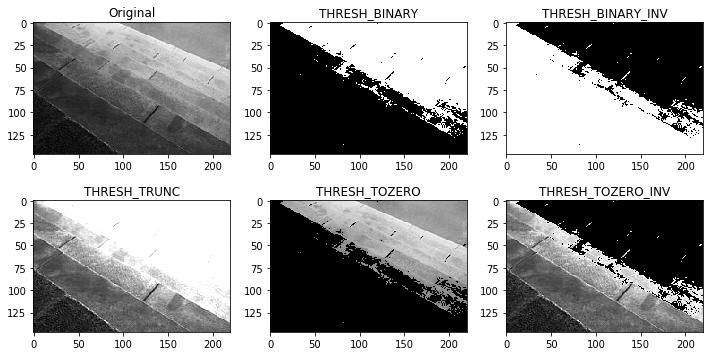

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(231)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

plt.subplot(232)
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))

plt.subplot(233)
plt.title('THRESH_BINARY_INV')
plt.imshow(grey2[1], cmap=plt.get_cmap('gray'))

plt.subplot(234)
plt.title('THRESH_TRUNC')
plt.imshow(grey3[1], cmap=plt.get_cmap('gray'))

plt.subplot(235)
plt.title('THRESH_TOZERO')
plt.imshow(grey4[1], cmap=plt.get_cmap('gray'))

plt.subplot(236)
plt.title('THRESH_TOZERO_INV')
plt.imshow(grey5[1], cmap=plt.get_cmap('gray'))

# <span style='color:teal'> 9. 이미지의 적응 임계점 처리</span>
**cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)**

  
- 적응 임계점 처리 함수
- max_value: 임계값을 넘었을 때 적용할 값
- adaptive_method: 임계값을 결정하는 계산 방법
    - ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정
    - ADAPTIVE_THRESH_GAUSSIAN_C: Gaussian 윈도우 기반의 가중치들의 합에서 C를 뺀 값을 임계점으로 설정
- type: 임계점을 처리하는 방식
- block_size: 임계값을 적용할 영역의 크기
- C: 평균이나 가중 평균에서 차감할 값

In [65]:
image = cv2.imread('images/hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)
thres1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

In [66]:
thres1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

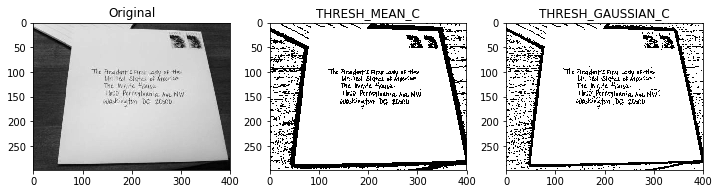

In [67]:
# 하나의 이미지에 다수의 조명 상태가 존재하는 경우
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original')
plt.imshow(image, cmap=plt.get_cmap('gray'))

plt.subplot(132)
plt.title('THRESH_MEAN_C')
plt.imshow(thres1, cmap=plt.get_cmap('gray'))

plt.subplot(133)
plt.title('THRESH_GAUSSIAN_C')
plt.imshow(thres2, cmap=plt.get_cmap('gray'))